<a href="https://colab.research.google.com/github/AndyAlyf/Klasifikasi-Text/blob/master/classifierProject_alphaPresented.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import library dan modules yang mo di pake**

In [2]:
!pip install Sastrawi

     |████████████████████████████████| 215kB 2.8MB/s 


In [0]:
import math 
import os
from collections import OrderedDict
import re
import string
import datetime
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import pandas as pd
import csv
from sklearn.model_selection import train_test_split

### **Preprocessing**

In [4]:
dok=[]
kolom=[]
kolom_unik=[]
j_kolomUnik=dict()
with open("datasetLabelled.csv",encoding='cp1252') as csf:
    readCSV = csv.reader(csf,delimiter=",")
    for i in readCSV:
        dok += [i[0]]
        kolom += [i[1]]
        if i[1] not in kolom_unik:
            kolom_unik += [i[1]]

for i in kolom_unik:
    j_kolomUnik[i] = 0

for i in kolom:
    j_kolomUnik[i]+=1

print(kolom_unik)
print(j_kolomUnik)
print(len(kolom_unik))
print(kolom)
print(len(kolom))
print(dok)
print(len(dok))
dok, x_test, kolom, y_test = train_test_split(dok, kolom, test_size = 0.2, random_state = 3)
print()
print("DATASET TRAIN")
print(dok)
print(kolom)
print(len(dok))
print()
print("DATASET TEST")
print(x_test)
print(y_test)
print(len(y_test))

['ekonomi', 'kuliner', 'otomotif', 'sport', 'teknologi']
{'ekonomi': 24, 'kuliner': 27, 'otomotif': 24, 'sport': 25, 'teknologi': 25}
5
['ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'sport', 'spor

In [5]:
dok_kolom = []
for i in kolom_unik:
    temp=""
    for j in (range(len(dok))):
        if(kolom[j] == i):
            temp = temp+dok[j]+" "
    dok_kolom += [temp]

print(dok_kolom)

['Kejaksaan Agung (Kejagung) menduga kerugian negara akibat kasus keuangan yang menimpa PT Asuransi Jiwasraya (Persero) bertambah jadi Rp 17 triliun. Awalnya, pemerintah mencatat kerugian negara akibat Jiwasraya Rp 13,7 triliun. Wakil Menteri Badan Usaha Milik Negara (BUMN) II Kartika Wirjoatmodjo membenarkan bahwa kerugian negara akibat Jiwasraya memang bertambah. "Memang bertambah, karena kan memang sudah diidentifikasi pertumbuhan nilai sahamnya memang segitu," Effendi sendiri memimpin Komisi Pemangku-Kepentingan dan Konsultasi Publik Kementerian Kelautan dan Perikanan (KP2-KKP). Komisi ini bertugas untuk memberi masukan kepada Menteri KKP dalam membuat keputusan. Komisi ini akan melakukan konsultasi publik dan menjadi pelopor untuk kerja sama riset dan pengembangan. Kembali ke permasalahan Effendi dengan Susi, Effendi menegaskan bahwa lobster tidak terancam punah. Menurutnya, memang sudah ada riset yang menyebutkan bahwa sudah ada lobster yang bisa ditetaskan, dengan fasilitas hatc

In [0]:
class preprocessing:
    def parsing(dokumen):
        stopword = open("stopword.txt","r").read().split("\n")
        dokumen = dokumen.lower().split()
        dokumen = [kata for kata in dokumen if kata not in stopword]
        return dokumen
    def cleaning(dokumen):
        tandabaca = string.punctuation
        domain = re.compile(r'[\S]+\.(net|com|org)[\S]*\s?')
        dokumenproses = dokumen.strip()
        dokumenproses = domain.sub('',dokumenproses)
        hasil = ''
        for i,karakter in enumerate(dokumenproses):
            if (karakter in tandabaca or karakter.isnumeric()):
                if (i != len(dokumenproses)-1):
                    nextkarakter = dokumenproses[i+1]
                    if (nextkarakter not in tandabaca and not nextkarakter.isnumeric() and nextkarakter != ' '):
                        hasil += ' '
            else:
                hasil += karakter
        return hasil


    def stemming(dokumen):
        return [StemmerFactory().create_stemmer().stem(kata) for kata in dokumen if kata]

    def preprocess(dokumen):
        return preprocessing.stemming(
            preprocessing.parsing(
                preprocessing.cleaning(dokumen)
            )
        )

### **Pembobotan**

In [7]:
class weighting:
    def __init__(self):
        self.dokumens = []
        self.fitur = []
        self.bobot_tf = []
    def setdokumen(self,dokumens):
        self.dokumens = dokumens
    def getfitur(self):
        self.fitur = list(OrderedDict((kata,None)for dokumen in self.dokumens for kata in dokumen).keys())
        return self.fitur
    def getbobot_tf(self):
        self.bobot_tf = [[dokumen.count(fitur)for dokumen in self.dokumens] for fitur in self.getfitur()]
        return self.bobot_tf
    def normalisasi(bobot_tf_2d):
        transpose = [[bobot_tf_2d [j][i]for j in range (len(bobot_tf_2d))]for i in range (len(bobot_tf_2d[0]))]
        for i,raw in enumerate (bobot_tf_2d):
            pembagi = math.sqrt(sum(math.pow(element,2)for element in raw))
            bobot_tf_2d[i] = [element/pembagi for element in raw]
        arr = [[bobot_tf_2d[j][i]for j in range (len(bobot_tf_2d))]for i in range (len(bobot_tf_2d[0]))]
        return arr

print("mulai",datetime.datetime.now())        
cls = weighting()
cls.setdokumen([preprocessing.preprocess(x)for x in dok_kolom])
fitur = cls.getfitur()
bobot_tf = cls.getbobot_tf()
bobot_weighted = weighting.normalisasi(bobot_tf)
print(fitur)
print(bobot_tf)
print(bobot_weighted)
print("selesai",datetime.datetime.now())

mulai 2020-02-27 10:01:43.460316
['jaksa', 'agung', 'jagung', 'duga', 'rugi', 'negara', 'akibat', 'uang', 'timpa', 'pt', 'asuransi', 'jiwasraya', 'persero', 'tambah', 'rp', 'triliun', 'perintah', 'catat', 'wakil', 'menteri', 'badan', 'usaha', 'milik', 'bumn', 'kartika', 'wirjoatmodjo', 'benar', 'identifikasi', 'tumbuh', 'nilai', 'saham', 'segitu', 'effendi', 'pimpin', 'komisi', 'mang', 'penting', 'konsultasi', 'publik', 'laut', 'ikan', 'kp', 'kkp', 'tugas', 'masuk', 'putus', 'pelopor', 'kerja', 'riset', 'kembang', 'masalah', 'sus', 'lobster', 'ancam', 'punah', 'turut', 'tetas', 'fasilitas', 'hatchery', 'alias', 'bibit', 'transportasi', 'salah', 'pilih', 'warga', 'jakarta', 'pergi', 'jabodetabek', 'ogah', 'angkut', 'kendara', 'pribadi', 'macet', 'jalan', 'hindar', 'sadar', 'kualitas', 'udara', 'buruk', 'guna', 'rumah', 'pr', 'hubung', 'budi', 'karya', 'sumadi', 'tinjau', 'rencana', 'bangun', 'bandara', 'diri', 'jawa', 'timur', 'kali', 'sekretaris', 'kabinet', 'pramono', 'anung', 'rakyat

### **Predict and Model**

In [0]:
class naifeBayes():
    def __init__(self,data,kolom,kolom_unik,kolomm):
        self.data=data
        self.kolom=kolom
        self.label_unik = kolom_unik
        self.label = kolomm
        

    def prints(self):
        print(self.data)
        print(self.kolom)
        print(self.label_unik)
        print(self.label)

    def prediksiAll(self,w):
        words = w
        high = 0
        kats = ""
        for x in range(len(self.label_unik)):
            kata_masuk = 0
            temp = 1
            for i in words:
                if (self.pcd(i,x)>0):
                    kata_masuk+=1
                temp = temp+self.pcd(i,x)
            if (kata_masuk == 0):
                temp = 0
            temp = temp*self.pc(self.label_unik[x])
            print("Peluang masuk kategori",self.label_unik[x],"adalah : ",temp)
            if (temp > high):
                high = temp
                kats = self.label_unik[x]

    def prediksi(self,w):
        words = w
        high = 0
        kats = ""
        for x in range(len(self.label_unik)):
            kata_masuk = 0
            temp = 1
            for i in words:
                if (self.pcd(i,x)>0):
                    kata_masuk+=1
                temp = temp*self.pcd(i,x)
            if (kata_masuk == 0):
                temp = 0
            temp = temp*self.pc(self.label_unik[x])
            # print("Peluang masuk kategori",self.label_unik[x],"adalah : ",temp)
            if (temp > high):
                high = temp
                kats = self.label_unik[x]
        return kats

    def pcd(self,c,x):
        temp = 0
        for i in range(len(self.kolom)):
            if (self.kolom[i] == c and self.data[x][i] > 0.0):
                temp = self.data[x][i]
        return temp

    def pc(self,x):
        leng = len(self.label)
        sumc = 0
        for i in self.label:
            if (x == i):
                sumc+=1
        temp = sumc / leng
        return temp

    def akurasi(self,l1,l2):
        sum=0
        sumj = len(l1)
        for i in range(len(l1)):
            if(l1[i] == l2[i]):
                sum+=1
        temp = sum/sumj
        return temp


### **Testing dan Akurasi**

In [9]:
nb = naifeBayes(bobot_weighted,fitur,kolom_unik,kolom)
true_label = kolom
artikel_t = dok
test_label =[]
print("mulai",datetime.datetime.now())     
for i in artikel_t:
    kats_arti = preprocessing.preprocess(i)
    kats_arti = [i for i in kats_arti if i in fitur]
    test_label += [nb.prediksi(kats_arti)]

print(true_label)
print(test_label)
print("Akurasi Train: ",nb.akurasi(test_label,true_label))
print("selesai",datetime.datetime.now())     
print()

true_label = y_test
artikel_t = x_test
test_label =[]
print("mulai",datetime.datetime.now())     
for i in artikel_t:
    kats_arti = preprocessing.preprocess(i)
    kats_arti = [i for i in kats_arti if i in fitur]
    test_label += [nb.prediksi(kats_arti)]

print(true_label)
print(test_label)
print("Akurasi Test: ",nb.akurasi(test_label,true_label))
print("selesai",datetime.datetime.now())     

mulai 2020-02-27 10:07:13.054823
['otomotif', 'otomotif', 'ekonomi', 'ekonomi', 'sport', 'otomotif', 'sport', 'sport', 'teknologi', 'teknologi', 'otomotif', 'ekonomi', 'otomotif', 'sport', 'teknologi', 'sport', 'kuliner', 'kuliner', 'teknologi', 'teknologi', 'kuliner', 'teknologi', 'kuliner', 'sport', 'sport', 'sport', 'teknologi', 'otomotif', 'sport', 'kuliner', 'sport', 'ekonomi', 'kuliner', 'sport', 'otomotif', 'ekonomi', 'teknologi', 'kuliner', 'otomotif', 'kuliner', 'ekonomi', 'sport', 'sport', 'kuliner', 'teknologi', 'otomotif', 'teknologi', 'sport', 'sport', 'ekonomi', 'otomotif', 'teknologi', 'otomotif', 'kuliner', 'sport', 'teknologi', 'kuliner', 'teknologi', 'kuliner', 'kuliner', 'sport', 'kuliner', 'kuliner', 'ekonomi', 'otomotif', 'teknologi', 'kuliner', 'otomotif', 'teknologi', 'otomotif', 'ekonomi', 'otomotif', 'otomotif', 'ekonomi', 'otomotif', 'ekonomi', 'sport', 'sport', 'kuliner', 'ekonomi', 'kuliner', 'sport', 'kuliner', 'ekonomi', 'sport', 'kuliner', 'teknologi', 'e

### **Test with Inputan**

In [10]:
nb = naifeBayes(bobot_weighted,fitur,kolom_unik,kolom)
artikel = x_test[13]
true_l = y_test[13]
print(artikel)
print(true_l)
kata_artikel = preprocessing.preprocess(artikel)
kata_artikel = [i for i in kata_artikel if i in fitur]
print(kata_artikel)
nb.prediksiAll(kata_artikel)

Tahukah anda, Papua Nugini merupakan negara yang memiliki ragam bahasa dan suku paling banyak di dunia? Negara yang berbatasan langsung dengan Propinsi Papua Barat ini memiliki sistem persaudaraan yang dikenal dengan istilah wantok. Setiap persaudaraan suku dibedakan berdasarkan bahasa yang digunakan. Uniknya, Papua Nugini memiliki 871 bahasa atau sekitar 11% dari total ragam bahasa dunia. Menarik sekali bukan? Ragam suku dan bahasa tersebut tentunya juga berpengaruh dalam keragaman budaya mulai dari musik, tari-tarian, upacara adat, hingga kuliner. Nah, kali ini saya tidak akan bercerita banyak soal keragaman budaya Papua Nugini tersebut. Sebaliknya, saya akan mengajak anda untuk mengenal satu kuliner yang dikenal di seantero Papua Nugini, terlepas dari apapun suku dan bahasa yang digunakan penduduknya. Pada saat saya sedang bertugas di KBRI Port Moresby di Papua Nugini, saya berkesempatan menghadiri peresmian Erima Youth Foundation (EYF). EYF merupakan yayasan sosial yang tugas utama

### **Visualisasi dan Presentasi**

In [11]:

present = []
temp_h= ["kata/fitur"]
for i in kolom_unik:
    temp_h += [i]
present+= [temp_h] 

for i in range(len(fitur)):
    temp_h = [fitur[i]]
    for j in range(len(kolom_unik)):
        temp = float(bobot_weighted[j][i])
        jis = f"{temp:.4f}"
        temp_h += [jis]
    present+=[temp_h]

df = pd.DataFrame(present)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

                    0        1        2         3       4          5
0          kata/fitur  ekonomi  kuliner  otomotif   sport  teknologi
1               jaksa   1.0000   0.0000    0.0000  0.0000     0.0000
2               agung   1.0000   0.0000    0.0000  0.0000     0.0000
3              jagung   1.0000   0.0000    0.0000  0.0000     0.0000
4                duga   1.0000   0.0000    0.0000  0.0000     0.0000
5                rugi   0.9950   0.0000    0.0000  0.0000     0.0995
6              negara   0.6299   0.2520    0.6299  0.0000     0.3780
7              akibat   0.9864   0.1644    0.0000  0.0000     0.0000
8                uang   0.4472   0.0000    0.0000  0.0000     0.8944
9               timpa   1.0000   0.0000    0.0000  0.0000     0.0000
10                 pt   0.8000   0.0000    0.6000  0.0000     0.0000
11           asuransi   1.0000   0.0000    0.0000  0.0000     0.0000
12          jiwasraya   1.0000   0.0000    0.0000  0.0000     0.0000
13            persero   1.0000   0

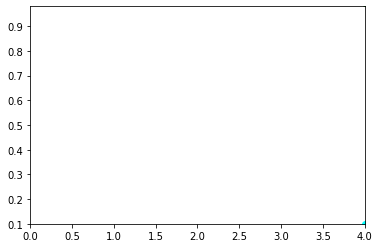

In [12]:
import matplotlib.pyplot as plt
import numpy as np

eko = bobot_weighted[0]
tekn = bobot_weighted[1]
oto = bobot_weighted[2]
spo = bobot_weighted[3]
kul = bobot_weighted[4]

x_l = eko+tekn+oto+spo+kul
# x1 = np.logspace(0, 1, len(spo), endpoint=True)
x1 = range(len(spo))
plt.scatter(x1,eko,c='green')
plt.scatter(x1,tekn,c='blue')
plt.scatter(x1,oto,c='red')
plt.scatter(x1,spo,c='yellow')
plt.scatter(x1,kul,c='cyan')
plt.ylim([0.1,0.98])
plt.xlim([0,4])

plt.show()